In [1]:
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.io import ascii

from properimage import propercoadd as pc
from properimage import propersubtract as ps
from properimage import utils
import stuffskywrapper as w

%matplotlib inline

In [2]:
font = {'family'        : 'sans-serif',
        'sans-serif'    : ['Computer Modern Sans serif'],
        'weight'        : 'regular',
        'size'          : 12}

text = {'usetex'        : True}

plt.rc('font', **font)
plt.rc('text', **text)

In [3]:
test_dir = os.path.abspath('./control_simu')
if not os.path.isdir(test_dir):
    os.makedirs(test_dir)

In [4]:
names = ['object_code', 'x', 'y', 'app_mag', 'bulge_to_total', 'bulge_rad', 'bulge_aspect', 'bulge_PA', 
         'disk_scale_l', 'disk_aspect', 'disk_PA', 'z', 'hubble_stage']

In [5]:
cat = ascii.read('cat.list', names=names)

In [6]:
cat

object_code,x,y,app_mag,bulge_to_total,bulge_rad,bulge_aspect,bulge_PA,disk_scale_l,disk_aspect,disk_PA,z,hubble_stage
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
200,63.2231,701.4906,24.0083,0.0,0.0,0.479,-111.31,0.298,0.241,-111.31,3.69235,10.0
200,159.9567,943.2902,24.0028,0.0,0.0,0.382,-168.82,0.4,0.221,-168.82,3.65029,10.0
200,933.0798,122.8438,24.6124,0.0,0.0,1.0,144.24,0.227,0.126,144.24,3.61485,10.0
200,967.4059,120.6305,23.7314,0.0,0.0,0.687,-28.29,0.24,0.349,-28.29,3.51221,10.0
200,718.0813,94.1202,24.1397,0.0,0.0,0.704,-146.05,0.457,0.259,-146.05,3.49206,10.0
200,277.9929,95.6494,23.2435,0.0,0.0,0.926,158.59,0.239,0.748,158.59,3.36637,10.0
200,582.9087,1021.0729,23.7117,0.0,0.0,0.862,-54.22,0.238,0.529,-54.22,3.37107,10.0
200,754.0164,819.9237,24.5256,0.0,0.0,0.724,121.19,0.247,0.219,121.19,3.35611,10.0
200,33.3273,848.0391,23.2283,0.0,0.0,0.599,71.0,0.401,0.509,71.0,3.34927,10.0


In [7]:
newcat = cat[-200:-50]

In [8]:
newcat_path = os.path.join(test_dir, 'newcat.list')

newcat.write(newcat_path, format='ascii.fast_no_header')

In [13]:
skyconf = {'image_name' : 'test.fits',
           'image_size' : 1024,
           'exp_time'   : 300,
           'mag_zp'     : 25.0,
           'px_scale'   : 0.3,
           'seeing_fwhm': 0.9, 
           'starcount_zp': 1e6,
           'starcount_slope': 0.1
           }

w.write_skyconf('conf.sky', skyconf)
img = w.run_sky('conf.sky', newcat_path, img_path=os.path.join(test_dir,'test_image.fits'))

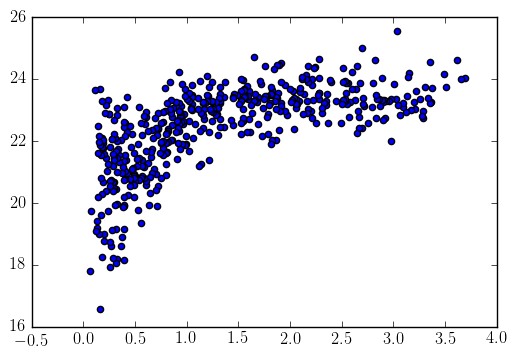

In [14]:
plt.scatter(cat['z'], cat['app_mag'])